# Unsupervised Learning with scikit-learn

Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to **discover patterns and sort them into clusters**. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to **segment them into categories based on their content**. This is the world of **unsupervised learning**, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead **uncovering hidden structure from unlabeled data**. 

**Unsupervised learning** encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. In this notebook, you'll learn the fundamentals of unsupervised learning and implement the essential algorithms using `scikit-learn` and `scipy`. You will learn how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the course by building a **recommender system** to recommend popular musical artists.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## How many clusters?

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

- Create an array called `xs` that contains the values of `points[:,0]` - that is, column 0 of points.
- Create an array called `ys` that contains the values of `points[:,1]` - that is, column 1 of points.
- Make a scatter plot by passing xs and ys to the plt.scatter() function.
- Call the `plt.show()` function to show your plot.

How many clusters do you see?

In [45]:
points = np.array([[0.06544649120573354, -0.7686637583746054],
 [-1.5290154723631335, -0.4295307892836781],
 [1.7099337125153655, 0.698852527207745],
 [1.1677914530353883, 1.0126263823062864],
 [-1.8011008765125671, -0.3186129561722616],
 [-1.635678878103174, -0.02859534770489522],
 [1.2199037530859576, 0.7464346306206472],
 [-0.2617515511040414, -0.6249293924445927],
 [-1.6192580392899492, -0.4798394895824938],
 [-1.843295821844137, -0.16694431084935166],
 [1.3599960195356797, 0.9499582661886437],
 [0.42291856473720796, -0.7349534005968037],
 [-1.6857613901150803, 0.10686727571590626],
 [0.9062999493855556, 1.0910516186925248],
 [-1.5647832151997594, -0.8467539409172038],
 [-0.025784901040515423, -1.1867253939984086],
 [0.8302732361682478, 1.1450461198177004],
 [1.224504318044118, 1.3506675856135453],
 [-0.15394595513245585, -0.7170430090340084],
 [0.8635880949171804, 1.068246134206403],
 [-1.433863658847475, -0.2381297048308357],
 [0.03844768620526845, -0.7463502234351036],
 [-1.585679224619341, 0.08499354465579917],
 [0.6359887951357822, -0.5847769797814781],
 [0.24417242307388476, -0.5317246502745662],
 [-2.196803585261628, 0.4947367720571247],
 [1.0323502988225113, -0.5568799954803777],
 [-0.2885806653720872, -0.39972527763075705],
 [0.20597008007219075, -0.8017153577365872],
 [-1.210730799565148, -0.3492410894419737],
 [1.3342368384681809, 0.7721489008208623],
 [1.1948015178340623, 1.047885558425092],
 [0.9917476953726534, 0.8920200767628542],
 [-1.8356219039361112, -0.04839732479614648],
 [0.08415720766561488, -0.7156432575403593],
 [-1.4897017522845528, -0.19299604094122305],
 [0.3878241808139117, -0.8206011901833663],
 [-0.014480440773439684, -0.9779840987237762],
 [-2.0521340998721707, -0.02129125401311013],
 [0.10331194324225318, -0.8216278059218872],
 [-0.4418931501740598, -0.6571097360468146],
 [1.103909263225082, 1.024811819134689],
 [-1.5922775939582692, -0.17374037962574693],
 [-1.473441520416564, -0.02202853049685249],
 [-1.3551470405553263, 0.2297106712795478],
 [0.04123369958015996, -1.2377662208006797],
 [0.4761516993039864, -1.136721236563179],
 [1.043356760427954, 0.8234590470870763],
 [-0.0796188170335298, -0.8567739353621651],
 [0.8706505901795596, 1.0805284140253724],
 [1.4026731334929738, 1.0752511922343315],
 [0.8011115670043031, 1.283428254742632],
 [-0.16527515500861514, -1.2358380385590229],
 [-0.3377922091012056, -0.5919432342243465],
 [0.8061074868332878, -0.7375215868012956],
 [-1.4359003186858177, -0.5638444576816151],
 [0.5486889533068995, -0.9514382937143939],
 [0.4680313077949052, -0.7497390745187791],
 [-1.513712896942057, -0.8391432284169498],
 [0.913843599841932, 1.5112653172575654],
 [-1.972339030423432, -0.41155374962957947],
 [0.5213406016331779, -0.8865489365482295],
 [0.6275949431557073, -1.185904771196431],
 [0.9416301405581072, 1.3539933545913059],
 [0.5699476779996157, 1.07036605536564],
 [-1.8766338206265312, 0.14745773409173726],
 [0.9061218594658672, 0.9108401052814168],
 [-1.3748145362460542, 0.28428394728799217],
 [-1.8056402943668943, -0.9671057419425316],
 [0.3430775659691717, -0.7999927487937941],
 [0.7038056620973427, 1.000258041761561],
 [-1.6848986211185557, -0.3056459496643352],
 [1.3147322131175057, 0.986149780647387],
 [0.2615121623829735, -0.2606925092787008],
 [0.9193121024473212, 0.823714845526499],
 [-1.2179592899480618, -0.2021967434650836],
 [-0.1772272310977897, -1.0266524532448829],
 [0.6482486163633215, -0.6682288060013553],
 [0.412067864292622, -0.28783784420181835],
 [1.0156820171676155, 1.1348166724278068],
 [0.6790025410486296, -0.9148950199813576],
 [-1.051827471063715, -0.010623762325267516],
 [0.6130659861093055, 1.7821038376771536],
 [-1.5021974801612847, -0.5230892170854781],
 [-1.7271729328459169, -0.4617391574563362],
 [-1.6099563119906712, -0.1821007032109933],
 [-1.0911102066045015, -0.07813980218573177],
 [-0.01046978156325079, -0.8091303412886869],
 [0.32782303252220457, -0.8073475437162415],
 [1.220385032027253, 1.195979302100845],
 [-1.333286810602751, -0.3000193743679564],
 [0.8795951689645072, 1.1156649125877478],
 [-1.148290981079215, -0.30400762010005744],
 [-0.5801975462632827, -1.1999601847068089],
 [-0.011611594015490669, -0.7846885353997791],
 [0.17359724107621646, -0.6339814535829698],
 [1.3273855590403572, 0.6775996875620109],
 [-1.9346732743106585, 0.30572472057151284],
 [-1.5776189340196929, -0.2772636496588521],
 [0.4763900025188839, 1.2142264755806365],
 [-1.6523750865252471, -0.6803981003840274],
 [-0.12609976246678, -1.0432745741405829],
 [-1.8960708245432247, -0.7008550197468331],
 [0.5746689857995531, 0.748783693306254],
 [-0.1666031224121718, -0.831102946952984],
 [0.8013354959100127, 1.2224443484235474],
 [1.1845542591567533, 1.434646700177676],
 [1.0886442772018283, 0.6466711158456921],
 [-1.6115850479861942, 0.2280572487292947],
 [-1.5751220451660382, -0.09612576005083648],
 [0.0721356955324795, -0.6964032764653807],
 [-1.4005429784650547, 0.16390597510235927],
 [1.0960771260886046, 1.1680469115344367],
 [-2.5434620433141517, -0.23089821715764086],
 [-1.3454487471580343, 0.25151125700096744],
 [-1.3547862853823236, -0.1910331668559034],
 [0.1836811292599628, -1.1582772499848413],
 [-1.3136867742972251, -0.3763569984538013],
 [0.09990128656336106, 1.2250049094266122],
 [1.1722557441252894, 1.3083514263524965],
 [0.08653969877007911, -0.7971437137358454],
 [-0.21053922872177586, -1.1342151077436895],
 [0.26496023904754856, -0.9476074245480344],
 [-0.2557591033928975, -1.0626602197221122],
 [-0.2603975738337485, -0.7477422467984205],
 [-1.917873593816116, 0.16434571406389192],
 [0.9302113924561816, 0.4943633069333503],
 [0.4477046652125147, -0.7287791759929736],
 [-1.6380286912248638, -0.5892552757456395],
 [-1.9571276340863957, -0.10125137401907584],
 [0.9270337011305244, 0.882514226728072],
 [1.2566009331779366, 0.6082807304621214],
 [-1.7281863178915309, 0.08416886607685152],
 [0.3499787973638875, -0.30490298294617035],
 [-1.516960820018647, -0.5091310892535825],
 [0.18763604846446186, -0.5542492405318324],
 [0.8960980862983607, 0.8355150812307898],
 [-1.5496885650240504, -0.1711478213441832],
 [1.215745697288779, 1.233177284686227],
 [0.20307745359011034, -1.0378490610962725],
 [0.8458908629104305, 1.0361527283579377],
 [0.5323791878568742, 1.4736288387658585],
 [-0.05319044083262858, -1.361505529107807],
 [1.388197431517556, 1.117299153890155],
 [1.0069630382934158, 1.036772104404645],
 [0.5668186879625374, -1.0963717575863503],
 [0.8688829648688388, 1.0524887417163158],
 [-1.1628660935320507, -0.5587524541922939],
 [0.27717767905113744, -0.8384401498713722],
 [0.16563267253352665, -0.8030660737386272],
 [0.3826330298198334, -0.4268324141890895],
 [1.1451980736781826, 0.896590262377021],
 [0.8145585690063701, 0.6753366702240604],
 [-1.8603152008514652, -0.0953756097092091],
 [0.9656409952874998, 0.9029557901112318],
 [-1.4989745116151008, -0.3325404360102928],
 [-0.13354890109847573, -0.8072758221114568],
 [0.12541527427567012, -1.1335490643888846],
 [1.0606243632066137, 1.2881635792978954],
 [-1.491545784548984, -0.20246410211880406],
 [1.1618903199872417, 1.2881987698905646],
 [0.5428203291239563, 0.7520352396594223],
 [0.8922106508467552, 0.9921162366040982],
 [-1.4993201058946146, -0.3243066695752808],
 [0.3166647012635424, -1.3448291507175296],
 [0.1397246854860243, -1.220974476481136],
 [-1.5499723960767195, -0.1078258420141638],
 [1.2384685817822878, 1.3766880413971587],
 [1.2555895446451386, 0.7202609833504818],
 [0.2555868919333049, -1.2852976316843507],
 [0.4516893307622061, -0.5595209318010728],
 [1.0620205708618238, 1.0340460421826372],
 [0.6745190801340936, -0.5497029857556341],
 [0.2275967613293482, -1.0272946849858042],
 [-1.458352812370112, -0.04951073923368979],
 [0.2327350078517041, -0.7084926203827929],
 [1.5967958880334026, 1.1139507626418677],
 [0.8047610524694737, 0.5446269982211378],
 [1.1549252092617004, 1.043521906912246],
 [0.5963277561336563, -1.1914289691414517],
 [0.02839068319290647, -0.4382936594500548],
 [1.1345158357541545, 0.5632632979739165],
 [0.2157620438343024, -1.044457529514499],
 [1.4104898664048482, 1.0283071932971288],
 [1.1228930156204953, 0.5802944134502128],
 [0.25200688174273445, -0.8258843605974264],
 [-1.2856608057922851, -0.07390909007813573],
 [1.5284981499353048, 1.1182246872982793],
 [-0.23907858404898005, -0.7054197249485433],
 [-0.25792784205946145, -0.8182503454141075],
 [0.5936781798705313, -0.4523991501399457],
 [0.07931909469133648, -0.29233213019632065],
 [-1.2725681463070748, 0.11630576987440865],
 [0.669301293330272, 1.0073148108513286],
 [0.34791545789361034, -1.208228767089348],
 [-2.112839925038438, -0.6689793468549369],
 [-1.629382396252732, -0.32718221913696793],
 [-1.5381913876982258, -0.015019717960366831],
 [-0.11988544731011096, -0.6036338950688659],
 [-1.54418955684223, -0.30389843747389284],
 [0.3002661436530568, -0.7772317303459549],
 [0.009354485200616963, -0.5388819155394995],
 [-1.3342439259126522, -0.11560430921312267],
 [0.4750448911523113, 0.7842138380132909],
 [0.5931326371015391, 1.2322389981754205],
 [0.413703694582358, -1.3520585677651438],
 [0.5584094792445969, 0.7883105304005376],
 [0.4985501752387235, -0.7899490037783341],
 [0.35675808586971114, -0.8103869319941585],
 [-1.8619782516712928, -0.5907130477671053],
 [-1.619776710874009, -0.1607668738067014],
 [0.8077929471500505, -0.7331129406344682],
 [1.6274577523743008, 0.6278716346647928],
 [-1.5699359287017738, -0.08467566885898843],
 [1.0255856065996505, 0.8938330199548162],
 [0.24293460986231455, -0.6088253049848489],
 [1.2313024182884664, 1.00262186248261],
 [-1.9651013042574703, -0.15886289144686555],
 [0.42795032119840093, -0.7038443183784787],
 [-1.5830681762844188, -0.19431922518999764],
 [-1.571959224996652, 0.014134687055555316],
 [-0.9814537326582891, 0.06132285389771569],
 [-1.4863784427733069, -0.5746531036642516],
 [0.9874582844136752, 0.6918805326527924],
 [1.2861972092838352, 1.281288207379233],
 [0.8585059551128833, 0.9554148145127936],
 [0.19028285631963046, -0.8211294209700777],
 [0.265610462319974, -0.04255238966504527],
 [-1.6189789738321865, 0.008623723050546345],
 [0.24070182637758594, -0.5266420923479008],
 [1.152209930162803, 0.4391669350892604],
 [-1.2196781174958202, -0.25803129868336666],
 [0.33412532725218475, -0.8611776145578867],
 [0.17131003346811258, -0.7563896476095736],
 [-1.1982839682225466, -0.7374466455494118],
 [-0.12245931761906542, -0.4564887912252412],
 [1.5120069752500735, 0.888257407072307],
 [1.1033886565948183, 0.9234747873184772],
 [1.309720948221406, 0.5906698871295553],
 [0.19964875767967785, 1.1485588868394758],
 [0.8146051520392743, 0.8453897200875109],
 [-1.6422739047620531, -0.422962062831202],
 [0.012243506797408292, -0.21247815863310515],
 [0.33709102487199016, -0.7461806494867055],
 [0.4730105400145989, 0.7271207469354536],
 [0.3470662595395132, 1.2303375668004732],
 [-0.003932786491855854, -0.9720969390416028],
 [-1.6430311859446451, 0.05276337015050203],
 [1.4464962531199248, 1.1421703264724763],
 [-1.93030086937966, -0.4002614600446369],
 [-2.3729613540644605, -0.7263364464821149],
 [0.4586012242999578, -1.060489534287036],
 [0.4896361019129961, -1.1892831318183212],
 [-1.0233590198483322, -0.1752057838356285],
 [-1.3276110716139322, -0.9396354945749504],
 [-1.509879085473856, -0.09473658216200102],
 [0.027230566962399616, -0.7987054916040169],
 [1.0169411977558729, 1.264617008757151],
 [0.4773352695039988, -0.9898471005648101],
 [-1.2778422374901173, -0.5474159989810934],
 [0.4989880164093402, -0.6237259029530492],
 [1.0600473141462636, 0.8687000769741766],
 [1.0020750128100304, 1.3829351167050397],
 [1.3116139353733458, 0.6283395589328151],
 [1.134284427193519, 1.1834654169384748],
 [1.2767134615403704, 0.966328781070547],
 [-0.6334288525144172, -0.977682512557856],
 [0.1269877885696956, -0.931423170361161],
 [-1.3451081215324, -0.2375422563556249],
 [-0.5316227754264695, -1.251535942097754],
 [0.21959933809083773, -0.9026993798427284],
 [-1.7899747917891926, -0.12115748411511088],
 [1.231974725796502, -0.07453764354880478],
 [1.4163536023718353, 1.2155175194021297],
 [-1.9028097613580028, -0.16389760152034846],
 [-0.2244008096180195, -0.7545424755075612],
 [0.5955941249273331, 0.9241455296828398],
 [1.219307731244579, 1.081752840147472],
 [-1.9942753549563843, -0.3758779909018822],
 [-1.2781847418397052, -0.5245455082345866],
 [0.6235268908283551, -1.0143010810673632],
 [0.14024251288742887, -0.4282660048507156],
 [-0.16145712613074958, -1.1635973109595263],
 [-1.7479586549697352, -0.06033100879409306],
 [-1.166597912654541, 0.09023930193838893],
 [0.411104079705134, -0.8084248985775087],
 [1.1475716820615272, 0.7780452823812295],
 [-1.6559074832196319, -0.4010544588749239],
 [-1.1530686547465177, 0.008586993168223117],
 [0.6089212149735674, 0.6897483335328548],
 [-0.08434137552326887, -0.976152563706225],
 [0.1917005299655985, -0.4233143781546386],
 [0.2966316166211803, -1.1335739943157594],
 [-1.3689362766976974, -0.2505212448026501],
 [-0.08037807115393003, -0.5678415453281473],
 [0.35695011364327656, -1.150644084910159],
 [0.024821793764037925, -0.6359482849591866],
 [-1.4907555757248412, -0.24825069850518605],
 [-1.4085879959335197, 0.2563543054178052],
 [-1.9827462594741505, -0.545844746986447]])

In [46]:
points[:10]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431]])

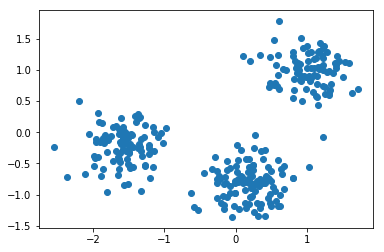

In [47]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show();

## Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a `KMeans` model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array points from the previous exercise, and also an array `new_points`.

In [53]:
new_points = np.array([[0.4002333320265674, -1.2654447065553371],
 [0.8032303700813846, 1.2826016688170383],
 [-1.3950755249367135, 0.055729292090629545],
 [-0.3411926769123959, -1.076619940010254],
 [1.547817473545126, 1.4025004898994076],
 [0.24503201753754994, -0.4834423276216081],
 [1.2070688617175875, 0.8887526050500794],
 [1.2513262772309852, 1.1555539518148343],
 [1.810044147829991, 0.9655307305763632],
 [-1.669634014657854, -0.30810350945803905],
 [-0.07174821045840446, -0.9379396997933668],
 [0.6826319270615404, 1.1025816032172124],
 [1.0903959845516995, 1.4389952903513694],
 [-1.6764541393208259, -0.5045570492933269],
 [-1.8444780366259956, 0.045253954376114465],
 [1.2423485050862004, 1.0208866089127862],
 [-1.8614704081677675, 0.00638645810856478],
 [-1.4604494285267078, 0.15325238308363198],
 [0.4989818169744145, 0.8980060577763966],
 [0.9839622443099741, 1.0436937477386998],
 [-1.831367418957484, -0.16363283503661946],
 [1.3062261736796343, 1.0765871744481543],
 [0.3534203282015242, -0.7513202179121603],
 [1.1395797044536962, 1.5450386043690263],
 [0.2939956935455874, -1.2613500521442478],
 [-1.145582247220963, -0.037870963554070464],
 [1.1871610476838488, 0.6002406629352124],
 [-2.232119462281373, 0.2304750944808799],
 [-1.2832042998796784, -0.3933145682714113],
 [0.4942966961525396, -0.8839720087642245],
 [0.06318349304308901, -0.9119522278514528],
 [0.9357595389694396, 0.8668206847501292],
 [1.5801472050501468, 1.0378839166980027],
 [1.0630495965303597, 1.0270608188286456],
 [-1.3973253641181504, -0.5051622490313863],
 [-0.10993523963069728, -0.908113619012788],
 [1.1734675783939748, 0.9475010921789884],
 [0.9200845106983088, 1.4576767182024295],
 [0.5826589564675202, -0.9000868321743926],
 [0.9527723280673276, 0.8990423859001851],
 [-1.3726695553001729, -0.031787821490623924],
 [0.02127067600085084, -0.7076141940283391],
 [0.3270490517353891, -0.5559981073787117],
 [-1.7159026735270893, 0.21522226611516804],
 [0.5125162088827879, -0.7601282452864132],
 [1.1302346873969018, 0.7224511221624661],
 [-1.430743100030984, -0.34278751082640724],
 [-1.8272462496627275, 0.11765777468368645],
 [1.41801349539704, 1.1145507980398308],
 [1.2689730355046054, 1.4192597123818338],
 [0.8040764937373096, 1.6398855683919011],
 [0.8345677518010617, 1.099566888938277],
 [-1.2471473202906656, -0.2235223195135434],
 [-1.294225372060266, 0.08187700243761464],
 [-0.22737831566090266, -0.4133313867163021],
 [0.21883038725584325, -0.4681831195396797],
 [-1.2259341395432908, 0.2555991474864147],
 [-1.3129403283209065, -0.4288920696757677],
 [-1.3353238174034492, 0.6520537761945147],
 [-0.3011002328629553, -1.2515645072433799],
 [0.20277835613322046, -0.9052774447453354],
 [1.0135778414771135, 1.1237898051898965],
 [0.8183243943552136, 0.8608412565444068],
 [1.2618155625202765, 1.4661374378864431],
 [0.4648677244304033, -0.7972124589573605],
 [0.3609088981639311, 0.8441067198291454],
 [-2.150983103026574, -0.3695839369151511],
 [1.0500528098687707, 0.8741813644980215],
 [0.10658007406809468, -0.7492681533935283],
 [-1.7394572308492744, 0.2521835769814145],
 [-0.11201768661400867, -0.6524697876040267],
 [0.5166189510067274, -0.6412675816881157],
 [0.3266217871239109, -0.8806080148889077],
 [1.0901775875963506, 1.109525584516946],
 [0.3644595761914319, -0.6942156216036032],
 [-1.9077931816808351, 0.18738367404067435],
 [-1.9560182911330304, 0.139959126119237],
 [0.3185417014931509, -0.4052717041359056],
 [0.7365126986835167, 1.7641625460023058],
 [-1.4417516180120409, -0.057232042866411585],
 [0.3217571684082834, -0.5342838213080934],
 [-1.3731730463544376, 0.04644846441285158],
 [0.06872259098410069, -1.1052294378912342],
 [0.9593142184469996, 0.6523162095118378],
 [-1.626419187808163, -0.5624232801807939],
 [1.0678830524625211, 0.7292604817658017],
 [-1.7964354693700573, -0.9883074177396988],
 [-0.09886283766053412, -0.06811980918444828],
 [-0.10513569966767866, 1.1702214346983502],
 [0.8799646993015682, 1.253403167715908],
 [0.9807534068479892, 1.1548653876175397],
 [-0.08332249663379743, -0.9248443677429224],
 [0.8487596732932929, 1.0939742455294217],
 [1.3294164939525177, 1.137345628305919],
 [0.3237880684751769, -0.7497324512066812],
 [-1.5261097030195439, -0.24901692884281745],
 [-1.4859811551413251, -0.2688286079948604],
 [-1.8047955294480482, 0.18705270020134698],
 [-2.0190734747511296, -0.4495116509492829],
 [0.28720240197139146, -0.6554874148914515],
 [0.8222951016345545, 1.3844323435720964],
 [-0.03569970357693916, -0.8018258068955944],
 [-1.6695543980809435, -0.13825850468570902],
 [-1.7822682110743764, 0.2933530329302973],
 [0.7258371377839856, -0.6233740238035452],
 [0.3884325927706244, -0.7612834972221451],
 [1.49002782668951, 0.7956786712532995],
 [0.0006554232279744611, -0.7405807019362622],
 [-1.3453311598066255, -0.4756299369161786],
 [-0.8038451057116693, -0.3099430125960101],
 [-0.2490412950059105, -1.0066241847122213],
 [-1.4109511807922228, -0.0706744126632764],
 [-1.7511959356833808, -0.30049133577057163],
 [-1.2794272423458892, 0.17377459990981498],
 [0.33502818267433954, 0.6247611513773945],
 [1.1681964908549058, 1.1890225089718274],
 [0.7152104568601423, 0.9260774191562786],
 [1.300572781743362, 0.916349564697178],
 [-1.2169700759337978, 0.1100394768992078],
 [-1.7070793484711009, -0.05996595355493217],
 [1.2073065505131004, 1.0548046315261794],
 [0.18689600860487554, -0.9580472344730616],
 [0.8034634709748233, 0.38613313957714746],
 [-1.7348679046802356, -0.14983191338255186],
 [1.3126149924762784, 1.11802981738963],
 [0.4049931475801489, -0.51090034730328],
 [-1.932679684301072, 0.22076469428888174],
 [0.6560047985146118, 0.9618871607020404],
 [-1.405882153104396, 0.1171344034664284],
 [-1.7430626422339452, -0.07474739588180918],
 [0.5437454124343493, 1.4720922360345101],
 [-1.973316692928232, -0.22712449341197186],
 [1.5390117095155558, 1.3604908086817358],
 [-1.4832345230186001, -0.4903020632514634],
 [0.3867484837065093, -1.261733998094538],
 [1.170157157781722, 1.185494153696634],
 [-0.0805381721060609, -0.32192362738669106],
 [-0.06822731561561057, -0.8528258870251585],
 [0.7135000278803649, 1.2786851950310625],
 [-1.8501437762114057, -0.5034905576730881],
 [0.06360852657782562, -1.4125703999747332],
 [1.5296606194895932, 0.9660565718481976],
 [0.16216571438837646, -1.3737484274059804],
 [-0.3234744968085503, -0.7066202689006988],
 [-1.5176899333956642, 0.1876583021123376],
 [0.8888959113837018, 0.7622371605566541],
 [0.48316403224714793, 0.8819318692890954],
 [-0.05529977660045904, -0.7113050163965421],
 [-1.5796644099147938, -0.6292203127968155],
 [0.05513086450579202, -0.8472067629036832],
 [-2.0600158163670144, 0.058769778676059974],
 [1.1181085496719971, 1.3025417465032032],
 [0.4870161641475913, -0.9901439374583558],
 [-1.6551804200375655, -0.16938638279232876],
 [-1.4434973799529995, 0.190299243117064],
 [-0.17007454748807474, -0.8267360220133111],
 [-1.824339789139913, -0.30781462607157506],
 [1.030934850193869, 1.2645769050131583],
 [1.6443116943156395, 1.2777311525997004],
 [-1.4761769264381148, 0.026078387244023254],
 [1.0095306707588962, 1.1427018140753182],
 [-1.4528563647019344, -0.25521620652981336],
 [-1.7409291726803937, -0.08344431770974857],
 [1.2203829912336142, 1.2869996131495278],
 [0.916925397059932, 0.7320702754102352],
 [-0.0016075418496920846, -0.7263755713166965],
 [0.8938412382881398, 0.8411466431487012],
 [0.6337919611890583, 1.0091513357290842],
 [-1.4792707460559875, -0.6997819362786284],
 [0.05447993735263179, -1.0644197014122958],
 [-1.5193556824925778, -0.4892769290772026],
 [0.28993902630874063, -0.7731455226767868],
 [-0.009681540610637612, -1.1330220710411107],
 [1.1347463930946602, 0.971541744341109],
 [0.5364214059773794, -0.8479063881175805],
 [1.1475986378655694, 0.6899152046491732],
 [0.5732919022586174, 0.7908027102433104],
 [0.2123773967237214, -0.6075698078151486],
 [0.5265795477728625, -0.8159302635461885],
 [-2.0183164148773765, 0.06786507404223903],
 [-0.23551262366373565, -1.0820513247221837],
 [0.15927477956772199, -0.6007172613865557],
 [0.22812035636194486, -1.1600354896605691],
 [-1.5365837800714561, 0.08407988075318508],
 [1.1395460916729012, 0.6317820011520845],
 [1.0111925531921029, 1.0436080478160479],
 [-0.14203986668230473, -0.4812303372945994],
 [-2.231201820617505, 0.08491629053739214],
 [0.1255548110642637, -1.017947931672471],
 [-1.7249350918334918, -0.6944261771347984],
 [-1.6043463038969006, 0.4455508679133457],
 [0.7371539787409838, 0.9265607436412832],
 [0.6729052709588117, 1.1336602959159123],
 [1.200664556764366, 0.7262730934489203],
 [0.07587472088808289, -0.9833783259664118],
 [1.2878326230927817, 1.1808860066647064],
 [1.065219295449487, 1.0071474604016484],
 [1.058716978914834, 1.129565193019349],
 [-1.1264340979123897, 0.16678774377085234],
 [-1.101572175412031, -0.3641378058993379],
 [0.23511821680542264, -0.1397699490301142],
 [1.1385379537720148, 1.010185185416075],
 [0.5312056535944205, -0.8819907915506771],
 [0.4330859360296099, -0.7640590419867354],
 [-0.00448926155719931, -1.3054841053771022],
 [-1.7634858858975817, -0.4974307390604293],
 [1.3648568100147571, 0.5834046987674564],
 [0.5669238996877362, 1.5139196303045417],
 [1.3573682575435084, 0.6709153176202536],
 [1.07173397131927, 0.6119908837452674],
 [1.0010691544116854, 0.8938153256093224],
 [1.33091007084542, 0.8797738791009336],
 [-1.7960374038799916, -0.0353883973153408],
 [-1.2722297859037501, 0.4001566415831013],
 [0.8474806027520546, 1.1703236354150213],
 [-1.5098912912157934, -0.7123183296610254],
 [-1.2495357580091535, -0.5578597299906052],
 [-1.277179730682378, -0.5993505497357117],
 [-1.81946743441716, 0.7370576727236302],
 [1.1994986715117046, 1.5696938611171598],
 [-1.255438466250899, -0.2338928257571077],
 [-1.6305205810978964, 0.1614558646111886],
 [1.1061130532991692, 0.7396982244750188],
 [0.6701931918150288, 0.8705670005920064],
 [0.36967015614450893, -0.6946453064135064],
 [-1.2636229292628256, -0.6992492849533154],
 [-0.3666875074417829, -1.3531025998574808],
 [0.244032146778522, -0.6594707932203552],
 [-1.2767914239764049, -0.48545341180964],
 [0.03774736124308442, -0.6992516050983633],
 [-2.1914853929412086, -0.4911994999491013],
 [-0.2932777772250221, -0.5894882119288223],
 [-1.6573739723897742, -0.2983377855098531],
 [0.7366388611344399, 0.5780370567291455],
 [1.1370908117465266, 1.3011975437641738],
 [-1.4414660113823912, 0.0313934680115914],
 [0.5923607081206381, 1.225451138247612],
 [0.6517194143329134, 0.49267489445638396],
 [0.5945591391812747, 0.8256373151538152],
 [-1.8790072189725529, -0.5218996262712949],
 [0.215225040643176, -1.2826985114132357],
 [0.4991459650764026, -0.6702686338109364],
 [-1.8295417631450963, -0.33926973062405463],
 [0.7927214032273834, 1.3378560641922397],
 [0.9543633716714262, 0.9803966258728768],
 [-1.353598455664638, 0.1039763401001232],
 [1.0559506192051886, 0.8070319271614147],
 [-1.9431101010974, -0.11897696424755992],
 [-1.3960413695739495, -0.3100959758834197],
 [1.2897762394609942, 1.0175336493188667],
 [-1.5950313888468417, -0.540574609207296],
 [-1.41994045911711, -0.381032569275004],
 [-0.02355698013966676, -1.1013370175277757],
 [-1.260385682681977, -0.6932738864756782],
 [0.9602159807545396, -0.8115536940366752],
 [0.551803308270898, -1.0179317577818612],
 [0.3701850851909715, -1.0688546750973675],
 [0.8255292066733384, 0.8770070597519889],
 [-1.870325947723697, 0.2875071987566922],
 [-1.5626076921394083, -0.1891967118876786],
 [-1.2634654755771513, -0.7747252373004758],
 [-0.06338004205825187, -0.7594006111349588],
 [0.8852982802867434, 0.8856205186736593],
 [-0.14332468573965634, -1.1608367821528174],
 [-1.8390872522515156, -0.3266555153279336],
 [0.2747092294908228, -1.045468290017301],
 [-1.4570357313623459, -0.2918420360744182],
 [-1.5904884225125158, 0.16606303108184184],
 [0.9255492842349158, 0.741406406421462],
 [0.19724546858474468, -0.7807032247389641],
 [0.2884016972818718, -0.8324255513983669],
 [0.7241416179667342, -0.7991491997426731],
 [-1.6265863937272311, -0.18000554338188188],
 [0.5844815882480341, 1.1319564042970958],
 [1.0214673158906118, 0.4596577990099158],
 [0.8650505541075891, 0.9577148872898591],
 [0.3987177664298797, -1.2427314680567312],
 [0.8622348918988015, 1.1095556084481029],
 [-1.3599943045133849, 0.024994265382756148],
 [-1.1917850535860444, -0.038294632325886896],
 [1.2939242406012197, 1.103205093863668],
 [1.256796300232616, -0.7798575815567014],
 [0.09380403020551704, -0.5532472578192074],
 [-1.735121753247433, -0.09762716669678152],
 [0.22315358715490693, -0.9434743514736362],
 [0.40198909967283897, -1.1096305109671036],
 [-1.4224415820890841, 0.181914703358554],
 [0.39247626718270345, -0.8784262773053151],
 [1.2518187471885425, 0.6936149956889932],
 [0.017748131656740745, -0.7203042351849521],
 [-1.877525213291965, -0.2638704239110657],
 [-1.580636023186551, -0.5504563439340334],
 [-1.5958949270817768, -0.15393289210602967],
 [-1.0182977039639498, 0.03885423697922805],
 [1.2481965891402875, 0.6600418031465439],
 [-1.2555137688133542, -0.02961720092068407],
 [-1.4186455928109607, -0.3582301789223188],
 [0.5257583257407314, 0.8705005425324366],
 [0.5555999878971989, 1.1876507197090485],
 [0.028134443916536883, -0.6991113135804631]])

In [54]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


In [55]:
new_points[0:10]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167],
       [-1.39507552,  0.05572929],
       [-0.34119268, -1.07661994],
       [ 1.54781747,  1.40250049],
       [ 0.24503202, -0.48344233],
       [ 1.20706886,  0.88875261],
       [ 1.25132628,  1.15555395],
       [ 1.81004415,  0.96553073],
       [-1.66963401, -0.30810351]])

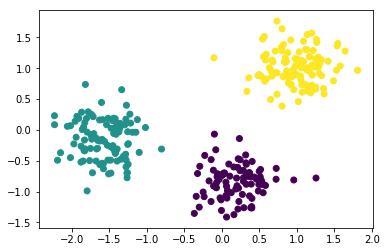

In [56]:
xs = new_points[:,0]
ys = new_points[:,1]
plt.scatter(xs, ys, c=labels)
plt.show();

## Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and labels is the array of their cluster labels.

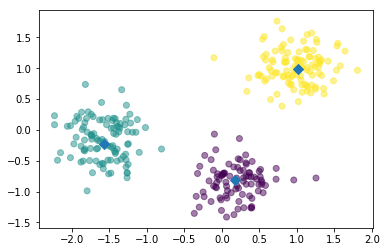

In [57]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show();

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you **evaluate the quality of a clustering**?

## How many clusters of grain?

To choose a **good number of clusters for a dataset** using the **k-means** we can use **inertia graph**. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

`The rule of thumb is to choose "elbow" in the inertia plot as the optimal number of clusters`.

In [58]:
samples = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22],
 [14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956],
 [14.29, 14.09, 0.905, 5.291, 3.3369999999999997, 2.699, 4.825],
 [13.84, 13.94, 0.8955, 5.324, 3.3789999999999996, 2.259, 4.805],
 [16.14, 14.99, 0.9034, 5.6579999999999995, 3.562, 1.355, 5.175],
 [14.38, 14.21, 0.8951, 5.386, 3.312, 2.4619999999999997, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999],
 [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0],
 [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877000000000001],
 [16.44, 15.25, 0.888, 5.8839999999999995, 3.505, 1.969, 5.5329999999999995],
 [15.26, 14.85, 0.8696, 5.7139999999999995, 3.242, 4.543, 5.314],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001],
 [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738],
 [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872],
 [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825],
 [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781000000000001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001],
 [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599, 5.046],
 [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649],
 [12.72, 13.57, 0.8686, 5.226, 3.049, 4.102, 4.914],
 [14.16, 14.4, 0.8584, 5.6579999999999995, 3.1289999999999996, 3.072, 5.176],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999],
 [15.88, 14.9, 0.8988, 5.617999999999999, 3.5069999999999997, 0.7651, 5.091],
 [12.08, 13.23, 0.8664, 5.099, 2.9360000000000004, 1.415, 4.961],
 [15.01, 14.76, 0.8657, 5.789, 3.245, 1.791, 5.001],
 [16.19, 15.16, 0.8849, 5.832999999999999, 3.4210000000000003, 0.903, 5.307],
 [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825],
 [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869],
 [14.11, 14.18, 0.882, 5.541, 3.221, 2.7539999999999996, 5.038],
 [13.45, 14.02, 0.8604, 5.516, 3.065, 3.531, 5.0969999999999995],
 [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056],
 [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228],
 [14.09,
  14.41,
  0.8529,
  5.7170000000000005,
  3.1860000000000004,
  3.92,
  5.2989999999999995],
 [13.94, 14.17, 0.8728, 5.585, 3.15, 2.124, 5.012],
 [15.05, 14.68, 0.8779, 5.712000000000001, 3.3280000000000003, 2.129, 5.36],
 [16.12, 15.0, 0.9, 5.709, 3.485, 2.27, 5.443],
 [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527],
 [17.08,
  15.38,
  0.9079,
  5.832000000000001,
  3.6830000000000003,
  2.9560000000000004,
  5.484],
 [14.8, 14.52, 0.8823, 5.656000000000001, 3.2880000000000003, 3.112, 5.309],
 [14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001],
 [13.54, 13.85, 0.8871, 5.348, 3.156, 2.5869999999999997, 5.178],
 [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176],
 [13.16, 13.55, 0.9009, 5.138, 3.201, 2.461, 4.783],
 [15.5, 14.86, 0.882, 5.877000000000001, 3.3960000000000004, 4.711, 5.528],
 [15.11, 14.54, 0.8986, 5.579, 3.4619999999999997, 3.128, 5.18],
 [13.8, 14.04, 0.8794, 5.376, 3.155, 1.56, 4.961],
 [15.36,
  14.76,
  0.8861,
  5.7010000000000005,
  3.3930000000000002,
  1.367,
  5.132000000000001],
 [14.99, 14.56, 0.8883, 5.57, 3.377, 2.958, 5.175],
 [14.79,
  14.52,
  0.8819,
  5.545,
  3.2910000000000004,
  2.7039999999999997,
  5.111000000000001],
 [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351],
 [14.43, 14.4, 0.8751, 5.585, 3.272, 3.975, 5.144],
 [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136],
 [14.49, 14.61, 0.8538, 5.715, 3.113, 4.1160000000000005, 5.396],
 [14.33, 14.28, 0.8831, 5.504, 3.199, 3.3280000000000003, 5.224],
 [14.52, 14.6, 0.8557, 5.7410000000000005, 3.113, 1.4809999999999999, 5.487],
 [15.03, 14.77, 0.8658, 5.702000000000001, 3.2119999999999997, 1.933, 5.439],
 [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044],
 [14.92, 14.43, 0.9006, 5.3839999999999995, 3.412, 1.1420000000000001, 5.088],
 [15.38, 14.77, 0.8857, 5.662000000000001, 3.4189999999999996, 1.999, 5.222],
 [12.11, 13.47, 0.8392, 5.159, 3.032, 1.5019999999999998, 4.519],
 [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607],
 [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703],
 [12.36, 13.19, 0.8923, 5.0760000000000005, 3.042, 3.22, 4.605],
 [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088],
 [12.78, 13.57, 0.8716, 5.2620000000000005, 3.0260000000000002, 1.176, 4.782],
 [12.88, 13.5, 0.8879, 5.138999999999999, 3.1189999999999998, 2.352, 4.607],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15],
 [14.01, 14.29, 0.8625, 5.609, 3.158, 2.217, 5.132000000000001],
 [14.37, 14.39, 0.8726, 5.569, 3.153, 1.464, 5.3],
 [12.73, 13.75, 0.8458, 5.412000000000001, 2.8819999999999997, 3.533, 5.067],
 [17.63, 15.98, 0.8673, 6.191, 3.5610000000000004, 4.0760000000000005, 6.06],
 [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001],
 [17.26, 15.73, 0.8763, 5.978, 3.594, 4.539, 5.791],
 [19.11, 16.26, 0.9081, 6.154, 3.93, 2.9360000000000004, 6.079],
 [16.82, 15.51, 0.8786, 6.017, 3.486, 4.004, 5.841],
 [16.77, 15.62, 0.8638, 5.9270000000000005, 3.438, 4.92, 5.795],
 [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001],
 [20.71,
  17.23,
  0.8763,
  6.579,
  3.8139999999999996,
  4.4510000000000005,
  6.4510000000000005],
 [18.94, 16.49, 0.875, 6.445, 3.639, 5.064, 6.362],
 [17.12, 15.55, 0.8892, 5.85, 3.5660000000000003, 2.858, 5.746],
 [16.53, 15.34, 0.8823, 5.875, 3.467, 5.532, 5.88],
 [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879],
 [20.2, 16.89, 0.8894, 6.285, 3.864, 5.172999999999999, 6.187],
 [19.57, 16.74, 0.8779, 6.3839999999999995, 3.772, 1.472, 6.273],
 [19.51, 16.71, 0.878, 6.3660000000000005, 3.801, 2.9619999999999997, 6.185],
 [18.27, 16.09, 0.887, 6.172999999999999, 3.6510000000000002, 2.443, 6.197],
 [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109],
 [18.98,
  16.66,
  0.8590000000000001,
  6.5489999999999995,
  3.67,
  3.6910000000000003,
  6.497999999999999],
 [21.18, 17.21, 0.8989, 6.5729999999999995, 4.033, 5.78, 6.231],
 [20.88, 17.05, 0.9031, 6.45, 4.032, 5.016, 6.321000000000001],
 [20.1, 16.99, 0.8746, 6.581, 3.785, 1.955, 6.449],
 [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053],
 [18.81, 16.29, 0.8906, 6.272, 3.693, 3.237, 6.053],
 [18.59, 16.05, 0.9066, 6.037000000000001, 3.86, 6.001, 5.877000000000001],
 [18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.4479999999999995],
 [16.87, 15.65, 0.8648, 6.138999999999999, 3.463, 3.696, 5.9670000000000005],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995],
 [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.452999999999999],
 [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273],
 [18.72,
  16.34,
  0.8809999999999999,
  6.218999999999999,
  3.6839999999999997,
  2.188,
  6.097],
 [16.41, 15.25, 0.8866, 5.718, 3.525, 4.217, 5.617999999999999],
 [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001],
 [19.46, 16.5, 0.8985, 6.1129999999999995, 3.892, 4.308, 6.0089999999999995],
 [19.18, 16.63, 0.8717, 6.369, 3.681, 3.3569999999999998, 6.229],
 [18.95, 16.42, 0.8829, 6.247999999999999, 3.755, 3.3680000000000003, 6.148],
 [18.83, 16.29, 0.8917, 6.037000000000001, 3.786, 2.553, 5.879],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [17.63, 15.86, 0.88, 6.0329999999999995, 3.573, 3.747, 5.928999999999999],
 [19.94, 16.92, 0.8752, 6.675, 3.763, 3.252, 6.55],
 [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894],
 [18.45, 16.12, 0.8921, 6.107, 3.7689999999999997, 2.235, 5.794],
 [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965],
 [19.13, 16.31, 0.9035, 6.183, 3.9019999999999997, 2.109, 5.9239999999999995],
 [19.14, 16.61, 0.8722, 6.2589999999999995, 3.737, 6.682, 6.053],
 [20.97, 17.25, 0.8859, 6.563, 3.991, 4.677, 6.316],
 [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.162999999999999],
 [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75],
 [19.15, 16.45, 0.889, 6.245, 3.815, 3.0839999999999996, 6.185],
 [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966],
 [20.03, 16.9, 0.8811, 6.492999999999999, 3.8569999999999998, 3.063, 6.32],
 [20.24, 16.91, 0.8897, 6.315, 3.9619999999999997, 5.901, 6.188],
 [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011],
 [16.17,
  15.38,
  0.8588,
  5.7620000000000005,
  3.387,
  4.2860000000000005,
  5.702999999999999],
 [18.43, 15.97, 0.9077, 5.98, 3.7710000000000004, 2.984, 5.905],
 [15.99, 14.89, 0.9064, 5.3629999999999995, 3.582, 3.3360000000000003, 5.144],
 [18.75,
  16.18,
  0.8999,
  6.111000000000001,
  3.8689999999999998,
  4.188,
  5.992000000000001],
 [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102],
 [17.98, 15.85, 0.8993, 5.979, 3.687, 2.2569999999999997, 5.919],
 [20.16, 17.03, 0.8735, 6.513, 3.773, 1.91, 6.185],
 [17.55, 15.66, 0.8991, 5.791, 3.69, 5.3660000000000005, 5.6610000000000005],
 [18.3, 15.89, 0.9108, 5.979, 3.755, 2.8369999999999997, 5.962000000000001],
 [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949],
 [15.38, 14.9, 0.8706, 5.8839999999999995, 3.2680000000000002, 4.462, 5.795],
 [16.16, 15.33, 0.8644, 5.845, 3.395, 4.266, 5.795],
 [15.56, 14.89, 0.8823, 5.776, 3.408, 4.9719999999999995, 5.847],
 [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971],
 [15.57, 15.15, 0.8527, 5.92, 3.2310000000000003, 2.64, 5.879],
 [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001],
 [16.23,
  15.18,
  0.885,
  5.872000000000001,
  3.472,
  3.7689999999999997,
  5.922000000000001],
 [13.07, 13.92, 0.848, 5.472, 2.9939999999999998, 5.303999999999999, 5.395],
 [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
 [13.34, 13.95, 0.862, 5.388999999999999, 3.074, 5.995, 5.307],
 [12.22, 13.32, 0.8652, 5.224, 2.967, 5.468999999999999, 5.221],
 [11.82, 13.4, 0.8274, 5.314, 2.7769999999999997, 4.471, 5.178],
 [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275],
 [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001],
 [12.49, 13.46, 0.8658, 5.267, 2.967, 4.421, 5.002],
 [12.7, 13.71, 0.8491, 5.386, 2.911, 3.26, 5.316],
 [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462000000000001, 5.194],
 [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307],
 [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27],
 [12.26, 13.6, 0.8333, 5.4079999999999995, 2.833, 4.756, 5.36],
 [11.18, 13.04, 0.8266, 5.22, 2.693, 3.332, 5.001],
 [11.36, 13.05, 0.8382, 5.175, 2.755, 4.048, 5.263],
 [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.218999999999999],
 [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003],
 [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22],
 [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31],
 [11.49, 13.22, 0.8263, 5.303999999999999, 2.695, 5.388, 5.31],
 [12.54,
  13.67,
  0.8425,
  5.4510000000000005,
  2.8789999999999996,
  3.082,
  5.4910000000000005],
 [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308],
 [12.05, 13.41, 0.8416, 5.267, 2.847, 4.988, 5.046],
 [12.55, 13.57, 0.8558, 5.332999999999999, 2.968, 4.419, 5.176],
 [11.14, 12.79, 0.8558, 5.011, 2.7939999999999996, 6.388, 5.0489999999999995],
 [12.1, 13.15, 0.8793, 5.105, 2.9410000000000003, 2.201, 5.056],
 [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27],
 [12.15,
  13.45,
  0.8443,
  5.417000000000001,
  2.8369999999999997,
  3.638,
  5.337999999999999],
 [11.35, 13.12, 0.8291, 5.176, 2.668, 4.337, 5.132000000000001],
 [11.24, 13.0, 0.8359, 5.09, 2.715, 3.5210000000000004, 5.088],
 [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.162999999999999],
 [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956],
 [11.27, 12.97, 0.8419, 5.088, 2.763, 4.309, 5.0],
 [11.4, 13.08, 0.8375, 5.136, 2.763, 5.587999999999999, 5.0889999999999995],
 [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185],
 [10.8, 12.57, 0.8590000000000001, 4.981, 2.821, 4.773, 5.063],
 [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092],
 [10.74, 12.73, 0.8329, 5.145, 2.642, 4.702, 4.963],
 [11.48, 13.05, 0.8473, 5.18, 2.758, 5.876, 5.002],
 [12.21, 13.47, 0.8453, 5.357, 2.8930000000000002, 1.661, 5.178],
 [11.41, 12.95, 0.856, 5.09, 2.775, 4.957, 4.825],
 [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147],
 [12.19, 13.36, 0.8579, 5.24, 2.909, 4.857, 5.1579999999999995],
 [11.65, 13.07, 0.8575, 5.1080000000000005, 2.85, 5.209, 5.135],
 [12.89, 13.77, 0.8541, 5.495, 3.0260000000000002, 6.185, 5.316],
 [11.56, 13.31, 0.8198, 5.3629999999999995, 2.6830000000000003, 4.062, 5.182],
 [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352],
 [10.91, 12.8, 0.8372, 5.088, 2.675, 4.178999999999999, 4.956],
 [11.23, 12.82, 0.8594, 5.0889999999999995, 2.821, 7.524, 4.957],
 [10.59, 12.41, 0.8648, 4.899, 2.787, 4.975, 4.794],
 [10.93, 12.8, 0.8390000000000001, 5.046, 2.717, 5.398, 5.045],
 [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001],
 [11.87,
  13.02,
  0.8795,
  5.132000000000001,
  2.9530000000000003,
  3.597,
  5.132000000000001],
 [10.82, 12.83, 0.8256, 5.18, 2.63, 4.853, 5.0889999999999995],
 [12.11, 13.27, 0.8639, 5.236000000000001, 2.975, 4.132, 5.012],
 [12.8, 13.47, 0.8859999999999999, 5.16, 3.1260000000000003, 4.873, 4.914],
 [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958],
 [13.37, 13.78, 0.8849, 5.32, 3.128, 4.67, 5.091],
 [12.62, 13.67, 0.8481, 5.41, 2.911, 3.306, 5.231],
 [12.76, 13.38, 0.8964, 5.073, 3.155, 2.8280000000000003, 4.83],
 [12.38, 13.44, 0.8609, 5.218999999999999, 2.989, 5.472, 5.045],
 [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745],
 [11.18, 12.72, 0.868, 5.0089999999999995, 2.81, 4.051, 4.828],
 [12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0],
 [12.37, 13.47, 0.8567, 5.204, 2.96, 3.9189999999999996, 5.001],
 [12.19,
  13.2,
  0.8783,
  5.1370000000000005,
  2.9810000000000003,
  3.6310000000000002,
  4.87],
 [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003],
 [13.2, 13.66, 0.8883, 5.236000000000001, 3.2319999999999998, 8.315, 5.056],
 [11.84, 13.21, 0.8521, 5.175, 2.8360000000000003, 3.5980000000000003, 5.044],
 [12.3,
  13.34,
  0.8684,
  5.242999999999999,
  2.9739999999999998,
  5.6370000000000005,
  5.063]])

In [61]:
samples[0:10]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ],
       [16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ],
       [16.44  , 15.25  ,  0.888 ,  5.884 ,  3.505 ,  1.969 ,  5.533 ]])

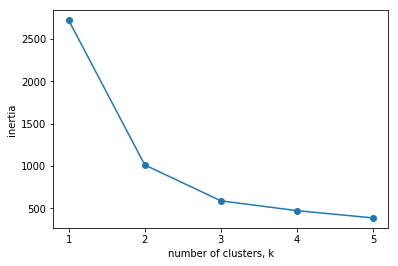

In [60]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show();

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.